In [1]:
import pandas as pd
import numpy as np

In [2]:
x=np.array([-7,2,-3,-11,14,6,8])

In [3]:
categories=pd.cut(x,4)# 4 interval
categories

[(-11.025, -4.75], (1.5, 7.75], (-4.75, 1.5], (-11.025, -4.75], (7.75, 14.0], (1.5, 7.75], (7.75, 14.0]]
Categories (4, interval[float64]): [(-11.025, -4.75] < (-4.75, 1.5] < (1.5, 7.75] < (7.75, 14.0]]

In [4]:
categories.categories

IntervalIndex([(-11.025, -4.75], (-4.75, 1.5], (1.5, 7.75], (7.75, 14.0]],
              closed='right',
              dtype='interval[float64]')

In [6]:
categories.codes#which bucket it belong

array([0, 2, 1, 0, 3, 2, 3], dtype=int8)

In [7]:
categories.ordered

True

In [8]:
pd.cut(x,4,retbins=True)

([(-11.025, -4.75], (1.5, 7.75], (-4.75, 1.5], (-11.025, -4.75], (7.75, 14.0], (1.5, 7.75], (7.75, 14.0]]
 Categories (4, interval[float64]): [(-11.025, -4.75] < (-4.75, 1.5] < (1.5, 7.75] < (7.75, 14.0]],
 array([-11.025,  -4.75 ,   1.5  ,   7.75 ,  14.   ]))

Example 2 

In [9]:
marks=np.array([70,20,30,99,40,16,80])

In [10]:
cat,bins=pd.cut(marks,4,retbins=True,labels=['poor','average','good','excellent'])

In [11]:
cat

[good, poor, poor, excellent, average, poor, excellent]
Categories (4, object): [poor < average < good < excellent]

In [12]:
bins

array([15.917, 36.75 , 57.5  , 78.25 , 99.   ])

KBINS DISCRETIZER

In [13]:
from sklearn.preprocessing import KBinsDiscretizer

In [14]:
marks=[[70],[20],[30],[99],[40],[16],[80]]#2d array

In [17]:
enc=KBinsDiscretizer(n_bins=4,encode='ordinal',strategy='uniform')

In [18]:
enc.fit(marks)

KBinsDiscretizer(encode='ordinal', n_bins=4, strategy='uniform')

In [21]:
enc.transform(marks)

array([[2.],
       [0.],
       [0.],
       [3.],
       [1.],
       [0.],
       [3.]])

In [22]:
enc.bin_edges_

array([array([16.  , 36.75, 57.5 , 78.25, 99.  ])], dtype=object)

In [23]:
x=[[-21,41,-14],[-13,23,-31],[9,30,-5],[0,24,-17]]

In [24]:
enc=KBinsDiscretizer(n_bins=4,encode='ordinal',strategy='quantile')

In [25]:
enc.fit(x)

KBinsDiscretizer(encode='ordinal', n_bins=4)

In [26]:
x_trans=enc.transform(x)

In [28]:
x_trans

array([[0., 3., 2.],
       [1., 0., 0.],
       [3., 2., 3.],
       [2., 1., 1.]])

In [29]:
enc.bin_edges_

array([array([-21.  , -15.  ,  -6.5 ,   2.25,   9.  ]),
       array([23.  , 23.75, 27.  , 32.75, 41.  ]),
       array([-31.  , -20.5 , -15.5 , -11.75,  -5.  ])], dtype=object)

In [31]:
enc.inverse_transform(x_trans)

array([[-18.   ,  36.875, -13.625],
       [-10.75 ,  23.375, -25.75 ],
       [  5.625,  29.875,  -8.375],
       [ -2.125,  25.375, -18.   ]])

Building MOdel

In [32]:
automobile_df=pd.read_csv('C:/Users/shubham.chhetri/Desktop/MYPROJECT/Machine learning/Preparing data for ML/mympgprocess.csv')

In [33]:
automobile_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [34]:
x=automobile_df['horsepower']
y=automobile_df['mpg']

In [35]:
import matplotlib.pyplot as plt

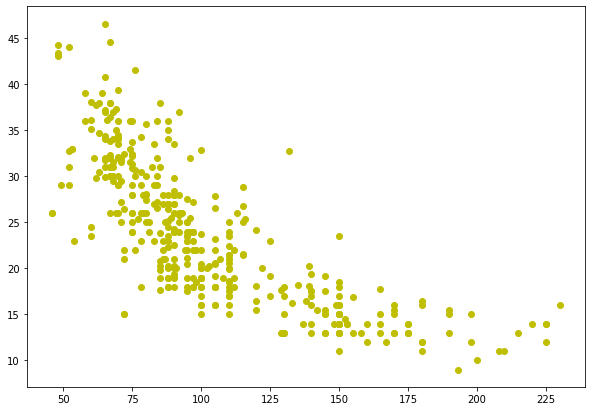

In [36]:
plt.figure(figsize=(10,7))
plt.plot(x,y,'o',c='y')
plt.show()

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [40]:
x=automobile_df['horsepower'].values.reshape(-1,1)
y=automobile_df['mpg'].values.reshape(-1,1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [41]:
reg=LinearRegression().fit(x_train,y_train)

In [42]:
y_pred=reg.predict(x_test)

In [43]:
from sklearn.metrics import r2_score
print("r2 score",r2_score(y_test,y_pred))

r2 score 0.548636342769997


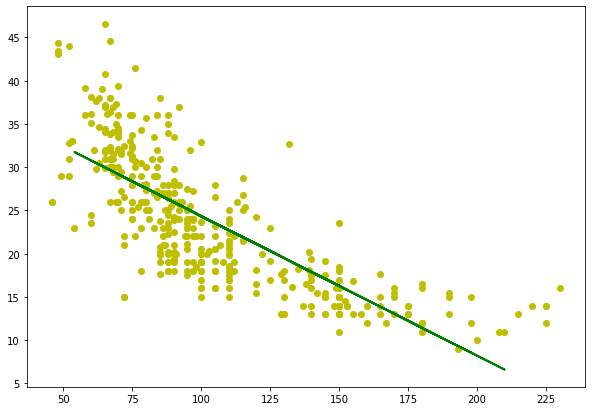

In [45]:
plt.figure(figsize=(10,7))
plt.plot(x,y,'o',c='y')
plt.plot(x_test,y_pred,linewidth=2,color='green',linestyle='-',label='linear regression')
plt.show()

In [46]:
enc=KBinsDiscretizer(n_bins=20,encode='ordinal')#no differece in horsepower bt 95 and 100 

In [47]:
x_binned=enc.fit_transform(x_train)

In [48]:
x_test_binned=enc.fit_transform(x_test)

In [49]:
reg=LinearRegression().fit(x_binned,y_train)

In [50]:
y_pred=reg.predict(x_test_binned)

In [51]:
print("r2 score",r2_score(y_test,y_pred))

r2 score 0.565653481511228


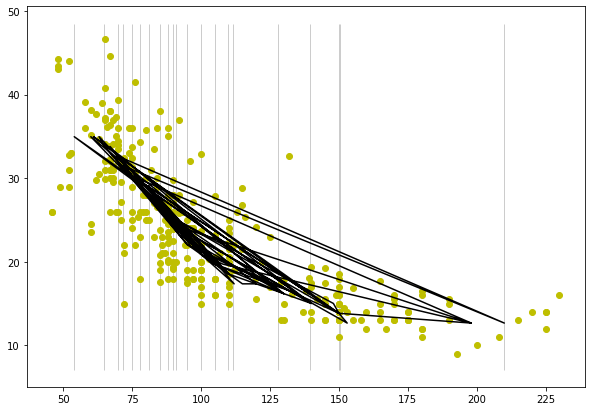

In [53]:
plt.figure(figsize=(10,7))
plt.plot(x_train,y_train,'o',c='y')
plt.plot(x_test,y_pred,color='k')
plt.vlines(enc.bin_edges_[0],*plt.gca().get_ylim(),linewidth=1,alpha=0.2)
plt.show()